**Email spam Detection with Machine Learning**

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.



In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started!



Download Dataset from https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# prompt: Using dataframe df: shape

# Get the shape of the dataframe (rows, columns)
df.shape

(5572, 5)

In [ ]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df1=df.dropna(axis=1)
df1.isnull().sum()

,0
v1,0
v2,0


In [ ]:
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df1.rename(columns={'v1':'class','v2':'text'},inplace=True)
df1.head()

<ipython-input-14-da43bf76c411>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'v1':'class','v2':'text'},inplace=True)


,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df1['class']=encoder.fit_transform(df1['class'])
df1.head()


<ipython-input-16-36e4f9a68d25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['class']=encoder.fit_transform(df1['class'])


,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df1.duplicated().sum()

403

In [ ]:
df1.drop_duplicates(keep='first',inplace=True)
df1.duplicated().sum()

<ipython-input-20-5ac97a15c8fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(keep='first',inplace=True)


0

In [ ]:
df1.shape

(5169, 2)

In [ ]:
df1['class'].value_counts()

,count
class,
0,4516
1,653


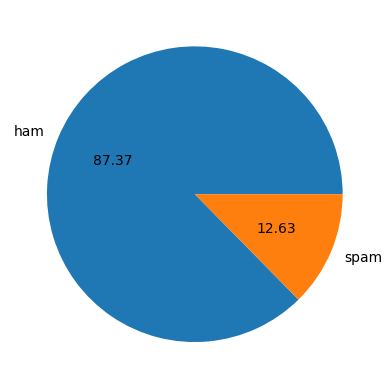

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df1['class'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df1['num_caracters']=df1['text'].apply(len)
df1.head(24)


<ipython-input-29-e8bb15290fe6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_caracters']=df1['text'].apply(len)


,class,text,num_caracters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


In [ ]:
df1['num_words']=df1['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df1.head()

<ipython-input-30-051c3af8bbab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_words']=df1['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,class,text,num_caracters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df1['num_sentences']=df1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df1.head()

<ipython-input-33-a75e65dc62a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_sentences']=df1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,class,text,num_caracters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df1[['num_caracters','num_words','num_sentences']].describe()

,num_caracters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df2=df1[['class','num_caracters','num_words','num_sentences']]
df2.groupby('class').describe()

num_caracters                                                           \
              count        mean        std   min    25%    50%    75%    max   
class                                                                          
0            4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0  910.0   
1             653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0   

      num_words             ...              num_sentences            \
          count       mean  ...   75%    max         count      mean   
class                       ...                                        
0        4516.0  17.123782  ...  22.0  220.0        4516.0  1.820195   
1         653.0  27.667688  ...  32.0   46.0         653.0  2.970904   

                                           
            std  min  25%  50%  75%   max  
class                                      
0      1.383657  1.0  1.0  1.0  2.0  38.0  
1      1.488425  1.0  2.0  3.0  4.0   9.0  

[2 rows x 24 columns]

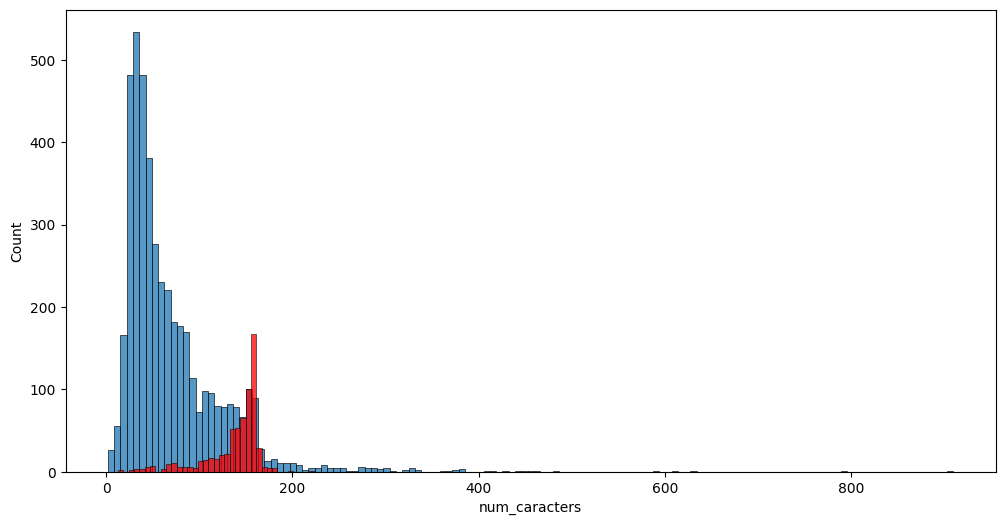

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['class'] == 0]['num_caracters'])
sns.histplot(df1[df1['class'] == 1]['num_caracters'],color='r')
plt.show()

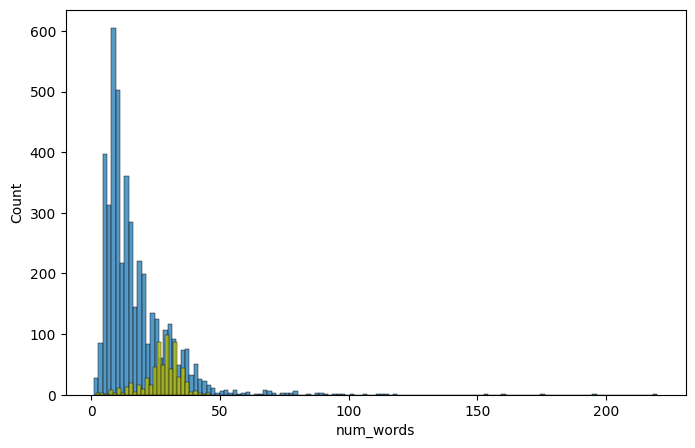

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df1[df1['class'] == 0]['num_words'])
sns.histplot(df1[df1['class'] == 1]['num_words'],color='y')
plt.show()

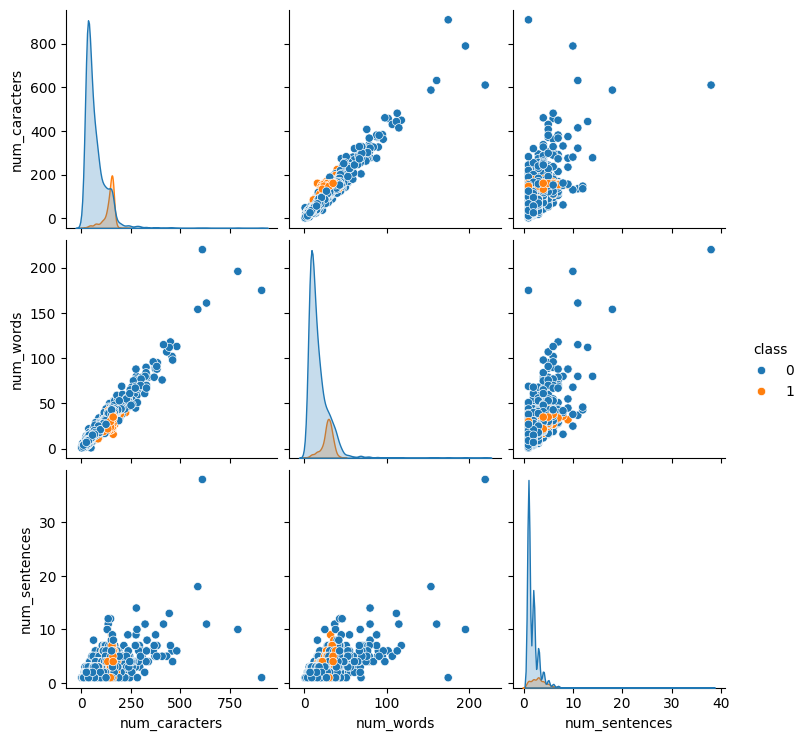

In [ ]:
sns.pairplot(df1,hue='class')


<Axes: >

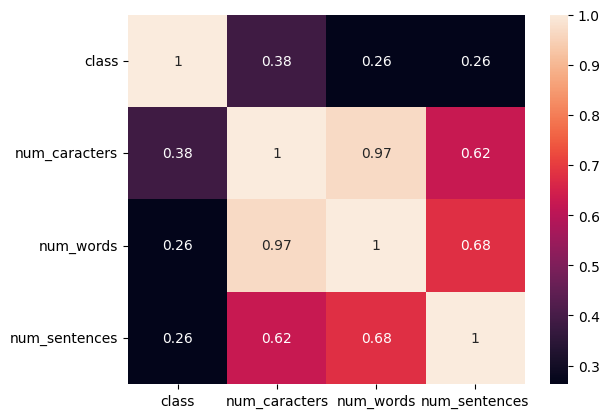

In [ ]:
sns.heatmap(df2.corr(),annot=True)

In [ ]:
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in  stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()


    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried e")

'gon na home soon want talk stuff anymor tonight k cri e'

In [ ]:
df1['transformed_text']=df1['text'].apply(transform_text)
df1.head()

<ipython-input-49-b6244ebf0d38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['transformed_text']=df1['text'].apply(transform_text)


,class,text,num_caracters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(height=500,width=800,background_color='white')

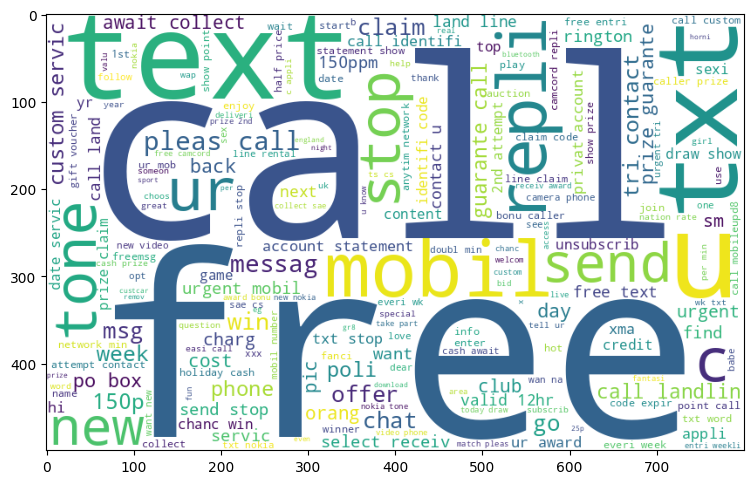

In [ ]:
spam_wc=wc.generate(df1[df1['class'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(9,9))
plt.imshow(spam_wc)

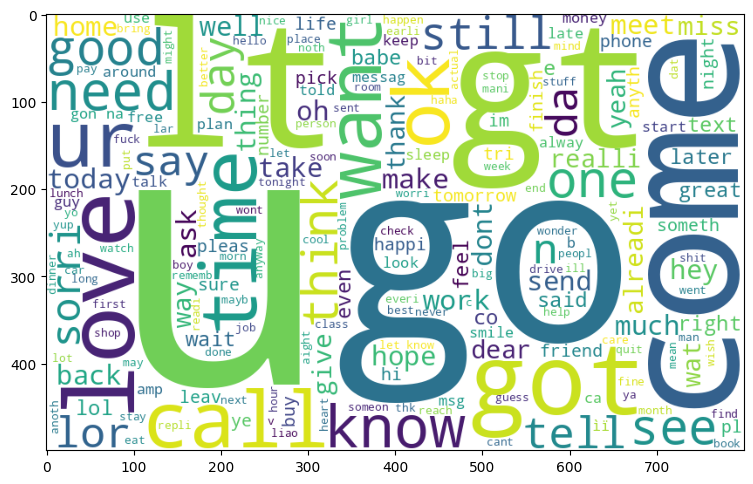

In [ ]:
ham_wc=wc.generate(df1[df1['class'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(9,9))
plt.imshow(ham_wc)

In [ ]:
df1.head()

,class,text,num_caracters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus=[]
for msg in df1[df1['class'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
ham_corpus=[]
for msg in df1[df1['class'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfid=TfidfVectorizer(max_features=3000)

In [ ]:
X=tfid.fit_transform(df1['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y=df1['class'].values
y.shape

(5169,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8,stratify=y)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_pred1,y_test))
cm=confusion_matrix(y_pred1,y_test)
print(cm)
print(precision_score(y_pred1,y_test))

0.8684719535783365
[[795  28]
 [108 103]]
0.7862595419847328


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_pred2,y_test))
cm=confusion_matrix(y_pred2,y_test)
print(cm)
print(precision_score(y_pred2,y_test))

0.971953578336557
[[903  29]
 [  0 102]]
0.7786259541984732


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_pred3,y_test))
cm=confusion_matrix(y_pred3,y_test)
print(cm)
print(precision_score(y_pred3,y_test))

0.9787234042553191
[[900  19]
 [  3 112]]
0.8549618320610687


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
svc=SVC(kernel='sigmoid',gamma=0.1)
knn = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
'svc':svc,
'knn':knn ,
'bnb':bnb ,
'dtc':dtc ,
'lrc':lrc ,
'rfc':rfc ,
'gbdt':gbdt,
'xgb':xgb

}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_pred,y_test)
    precision=precision_score(y_pred,y_test)
    return accuracy,precision


In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9323017408123792, 0.46564885496183206)

In [ ]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print('For ',name)
    print('accuracy - ',current_accuracy)
    print('precision - ',current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  svc
accuracy -  0.9323017408123792
precision -  0.46564885496183206
For  knn
accuracy -  0.9119922630560928
precision -  0.3053435114503817
For  bnb
accuracy -  0.9787234042553191
precision -  0.8549618320610687
For  dtc
accuracy -  0.9294003868471954
precision -  0.5267175572519084
For  lrc
accuracy -  0.9506769825918762
precision -  0.6564885496183206
For  rfc
accuracy -  0.9690522243713733
precision -  0.7557251908396947
For  gbdt
accuracy -  0.9506769825918762
precision -  0.6412213740458015
For  xgb
accuracy -  0.965183752417795
precision -  0.7557251908396947


In [ ]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'accuracy':accuracy_scores,'precision':precision_scores})
performance_df

,Algorithm,accuracy,precision
0,svc,0.932302,0.465649
1,knn,0.911992,0.305344
2,bnb,0.978723,0.854962
3,dtc,0.929400,0.526718
4,lrc,0.950677,0.656489
5,rfc,0.969052,0.755725
6,gbdt,0.950677,0.641221
7,xgb,0.965184,0.755725


from matplotlib import pyplot as plt
performance_df['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_df['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
performance_df.groupby('Algorithm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_df.plot(kind='scatter', x='accuracy', y='precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_df['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
performance_df['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(performance_df['Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(performance_df, x='accuracy', y='Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(performance_df['Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(performance_df, x='precision', y='Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('bnb',bnb),('rfc',rfc),('xgb',xgb)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('bnb', BernoulliNB()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamm...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...))],
                 voting='soft')

In [ ]:
y_pred=voting.predict(X_test)
print('accuracy',accuracy_score(y_pred,y_test))
print('precision',precision_score(y_pred,y_test))

accuracy 0.9738878143133463
precision 0.8091603053435115


In [ ]:
from sklearn.ensemble import StackingClassifier
estimators=[('bnb',bnb),('rfc',rfc),('xgb',xgb)]
final_estimators=RandomForestClassifier()

In [ ]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimators)
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('bnb', BernoulliNB()),
                               ('rfc',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, ga...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=50, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=2, ...))],
                   final_estimator=RandomForestClassifier())

In [ ]:
y_pred=clf.predict(X_test)
print('accuracy',accuracy_score(y_pred,y_test))
print('precision',precision_score(y_pred,y_test))

accuracy 0.9816247582205029
precision 0.8778625954198473


In [ ]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[900,  16],
       [  3, 115]])